In [1]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import defaultdict
import os
import numpy as np
import cv2

In [2]:
df = pd.read_csv(r'data/openfoodfactory.csv', sep='\t',on_bad_lines='skip')
print(f"The number of rows in the DataFrame is: {df.shape[0]}")

C:\Users\inesad00\AppData\Local\Temp\ipykernel_7344\1130488704.py:1: DtypeWarning: Columns (0,11,17,31,32,33,34,35,45,46,50,52,53,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\inesad00\Downloads\en.openfoodfacts.org.products.csv\en.openfoodfacts.org.products.csv", sep='\t',on_bad_lines='skip')


The number of rows in the DataFrame is: 3427907


In [3]:
df_sample = df[:50000]

In [4]:
categories_df = df_sample["categories"].value_counts().reset_index()
categories_df

categories  count
0                                                Snacks   1798
1                 Snacks, Sweet snacks, Confectioneries    971
2                         Condiments, Sauces, Groceries    831
3                                          Frozen foods    745
4     Dairies, Fermented foods, Fermented milk produ...    682
...                                                 ...    ...
4017  Aliments et boissons à base de végétaux, Boiss...      1
4018  Petit-déjeuners, Produits à tartiner, Produits...      1
4019  Aliments et boissons à base de végétaux, Alime...      1
4020   Tartes sucrées, Tartes, Tartes à la noix de coco      1
4021  Plant-based foods and beverages, Plant-based f...      1

[4022 rows x 2 columns]

In [5]:
single_labled_categories_df = categories_df[~categories_df["categories"].str.contains(",")]
multi_labled_categories_df = categories_df[categories_df["categories"].str.contains(",")]

In [6]:
single_labled_categories_df

categories  count
0                 Snacks   1798
3           Frozen foods    745
9          Salted snacks    506
20    Baking decorations    237
22       Cooking helpers    216
...                  ...    ...
4006      Taco Seasoning      1
4010           Calissons      1
4011           seasoning      1
4012        veganes hack      1
4014          en:popcorn      1

[743 rows x 2 columns]

In [7]:
multi_labled_categories_df

categories  count
1                 Snacks, Sweet snacks, Confectioneries    971
2                         Condiments, Sauces, Groceries    831
4     Dairies, Fermented foods, Fermented milk produ...    682
5     Snacks, Sweet snacks, Biscuits and cakes, Bisc...    639
6     Plant-based foods and beverages, Plant-based f...    573
...                                                 ...    ...
4017  Aliments et boissons à base de végétaux, Boiss...      1
4018  Petit-déjeuners, Produits à tartiner, Produits...      1
4019  Aliments et boissons à base de végétaux, Alime...      1
4020   Tartes sucrées, Tartes, Tartes à la noix de coco      1
4021  Plant-based foods and beverages, Plant-based f...      1

[3279 rows x 2 columns]

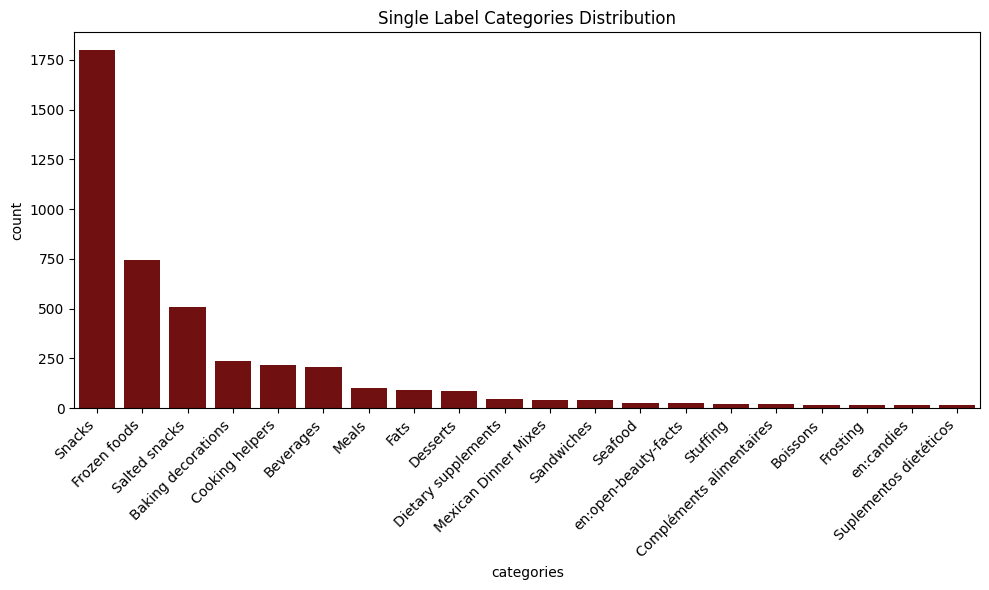

C:\Users\inesad00\AppData\Local\Temp\ipykernel_7344\609885379.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


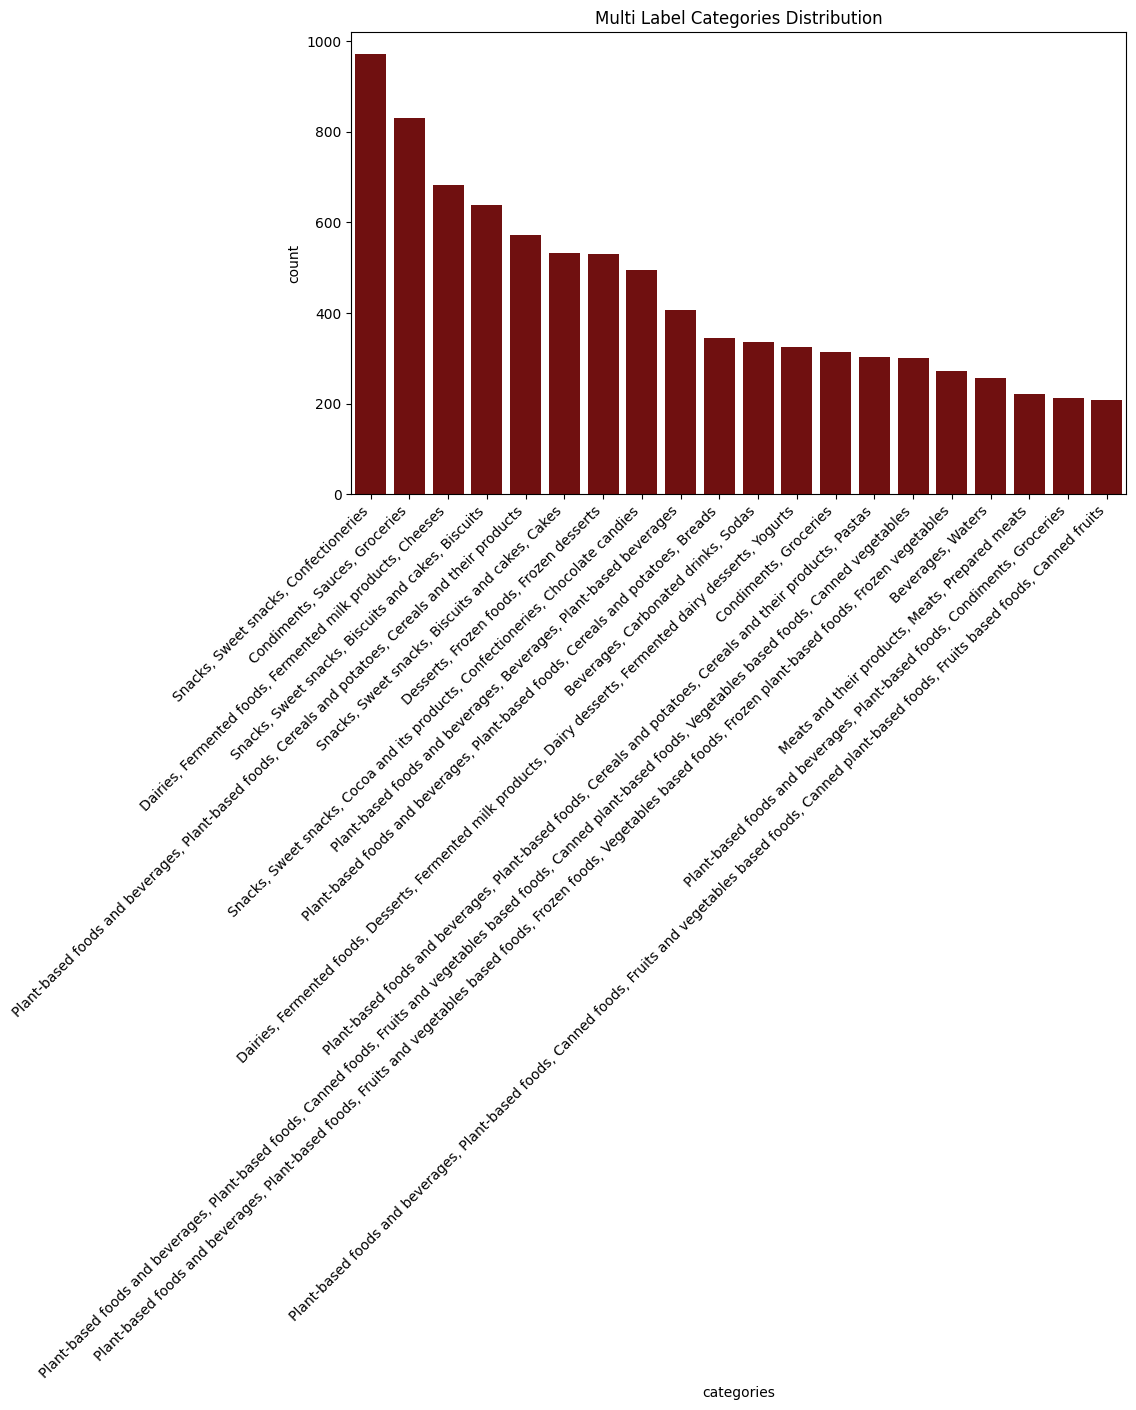

In [8]:
# Single label Categories distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=single_labled_categories_df.head(20), x="categories", y="count", color='maroon')
plt.title("Single Label Categories Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Multi label Categories distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=multi_labled_categories_df.head(20), x="categories", y="count", color='maroon')
plt.title("Multi Label Categories Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
processed = df_sample.drop(columns=['created_t','created_datetime','last_updated_t','last_modified_t','last_modified_datetime','last_modified_datetime','last_updated_datetime'])

Columns related to 'created': ['created_t', 'created_datetime']
Columns related to 'last': ['last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'last_updated_datetime', 'last_image_t', 'last_image_datetime']
Columns related to 'product': ['product_name', 'product_quantity']
Columns related to 'packaging': ['packaging', 'packaging_tags', 'packaging_en', 'packaging_text']
Columns related to 'brands': ['brands', 'brands_tags']
Columns related to 'categories': ['categories', 'categories_tags', 'categories_en']
Columns related to 'origins': ['origins', 'origins_tags', 'origins_en']
Columns related to 'manufacturing': ['manufacturing_places', 'manufacturing_places_tags']
Columns related to 'labels': ['labels', 'labels_tags', 'labels_en']
Columns related to 'emb': ['emb_codes', 'emb_codes_tags']
Columns related to 'cities': ['cities', 'cities_tags']
Columns related to 'countries': ['countries', 'countries_tags', 'countries_en']
Columns related to 'ingredients': 

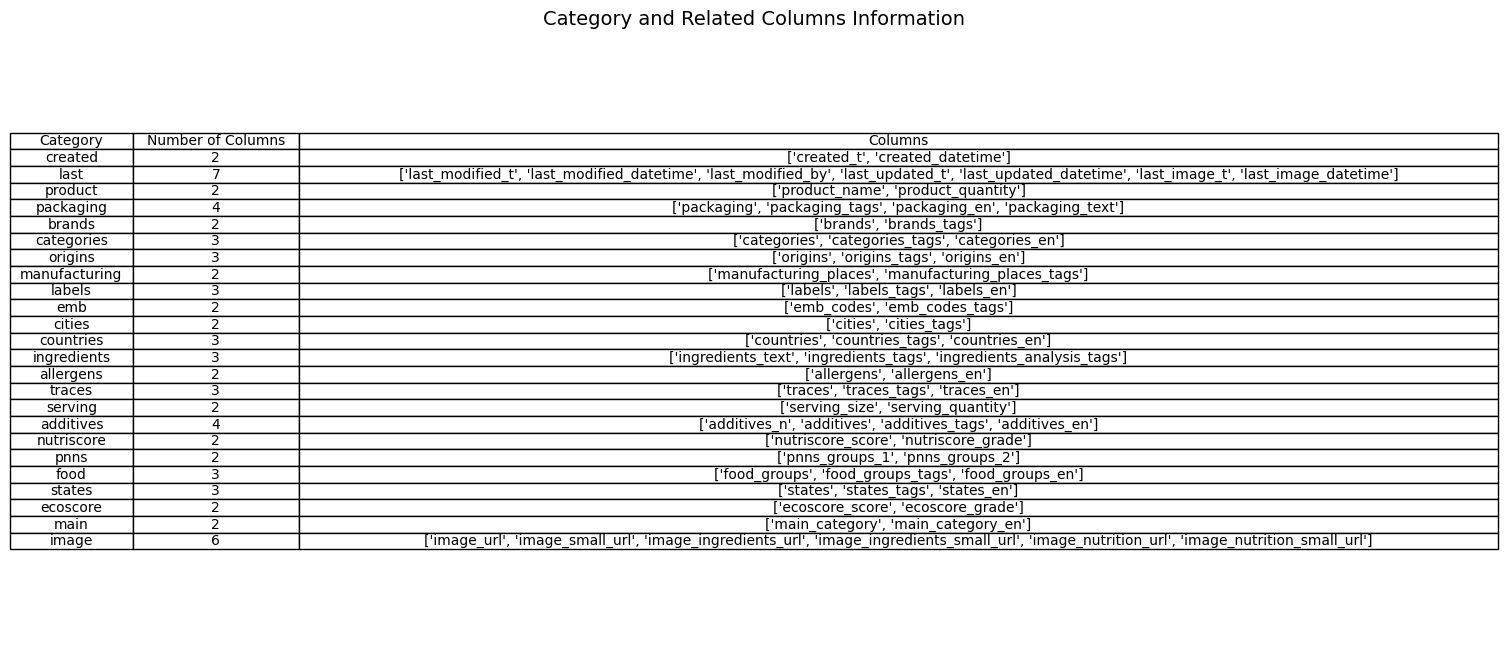

In [11]:
# Get all column names
columns = df.columns.tolist()

# Initialize a dictionary to store similar columns
similar_columns = defaultdict(list)

# Group columns based on their substrings
for col in columns:
    # Use a common substring for grouping (e.g., splitting by underscores)
    key = col.split('_')[0]  # You can adjust the logic as needed
    similar_columns[key].append(col)

# Remove keys with only one column (if desired)
similar_columns = {k: v for k, v in similar_columns.items() if len(v) > 1}

# Display similar columns
for key, value in similar_columns.items():
    print(f"Columns related to '{key}': {value}")

# Convert dictionary to DataFrame
df = pd.DataFrame([(key, len(value), value) for key, value in similar_columns.items()],
                  columns=['Category', 'Number of Columns', 'Columns'])

# Plot the table in a graph
fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Auto-adjust column width
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show the table as a graph
plt.title('Category and Related Columns Information', fontsize=14)
plt.show()

In [12]:
req_cols = list(processed.loc[:,'energy-kj_100g':].columns)
req_cols.extend(('categories_en', 'brands_tags', 'allergens_en', 'serving_quantity', 'ingredients_tags', 'image_ingredients_url', 'image_nutrition_url'))


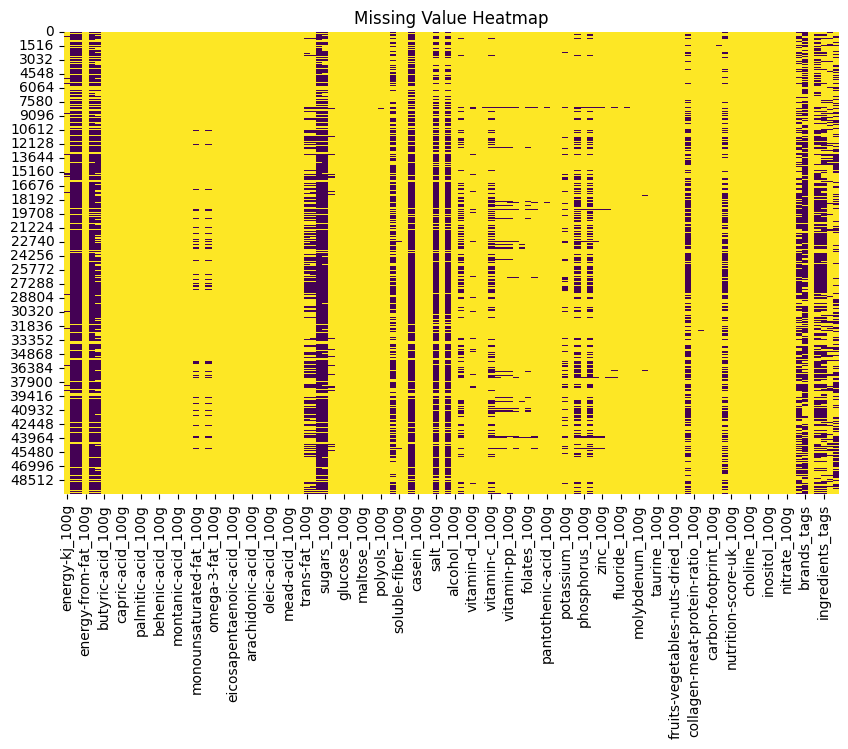

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(processed[req_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

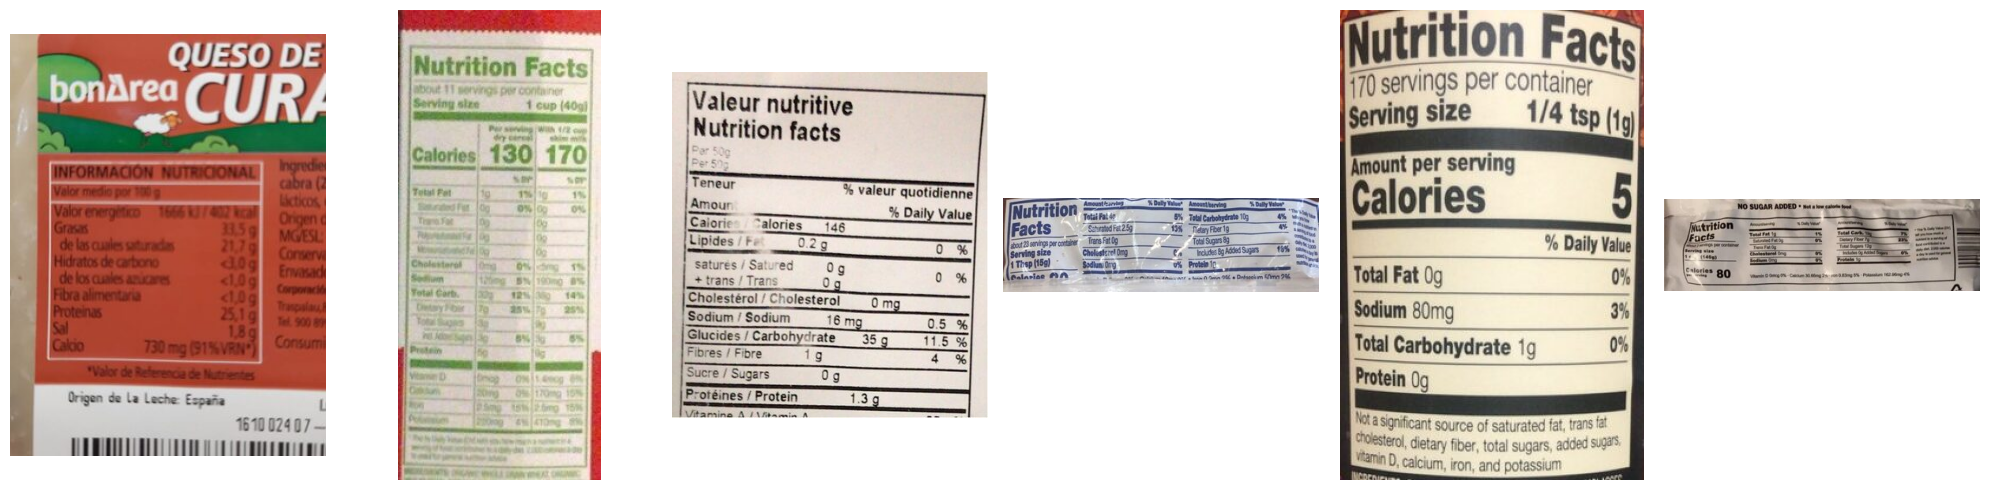

In [14]:


# Assuming 'image_url' is the column name in your DataFrame that contains the URLs
def plot_sample_images(df, url_column, sample_size=5):
    # Randomly sample URLs from the DataFrame
    sample_urls = df[url_column].dropna().sample(n=sample_size).values

    # Plot images in subplots
    fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))

    for i, url in enumerate(sample_urls):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Replace 'your_dataframe' with your actual DataFrame and 'image_url_column' with the correct column name

plot_sample_images(df_sample[~df_sample['image_nutrition_url'].isna()], 'image_nutrition_url', sample_size=6)

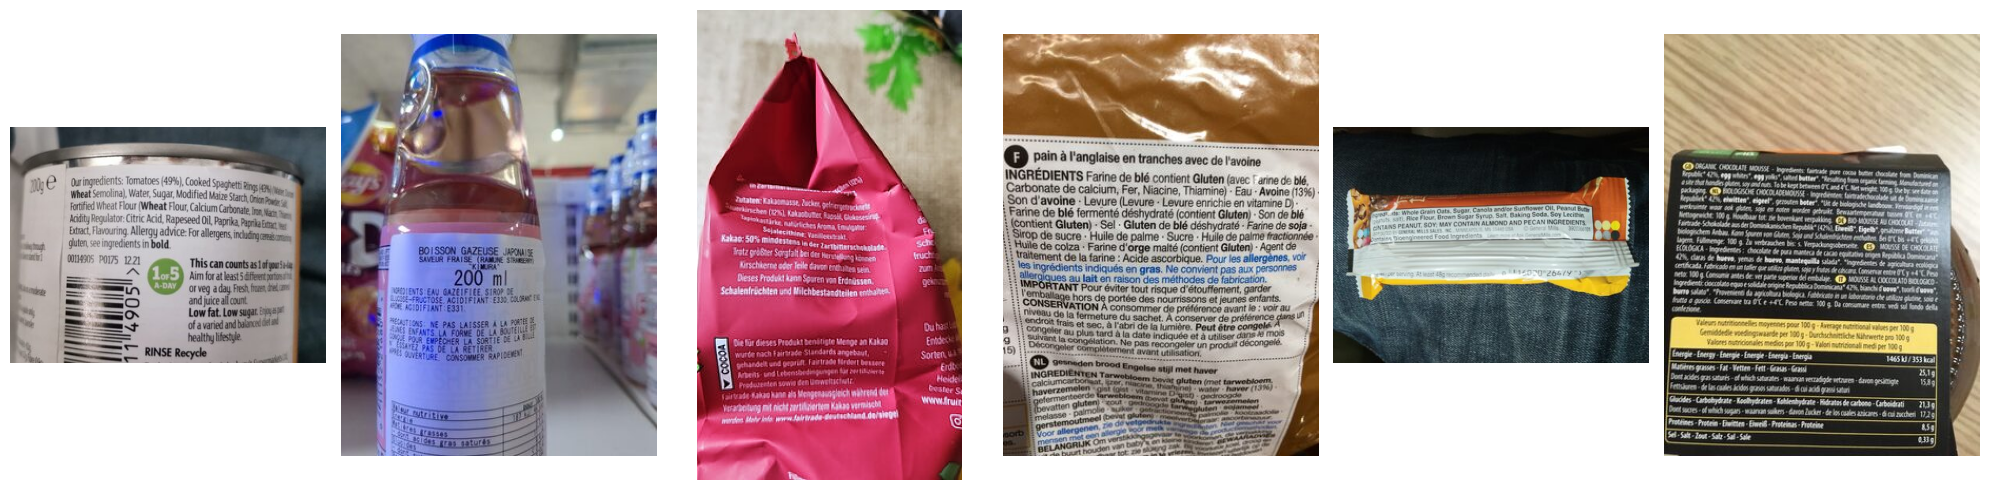

In [15]:
plot_sample_images(df_sample[~df_sample['image_ingredients_url'].isna()], 'image_ingredients_url', sample_size=6)

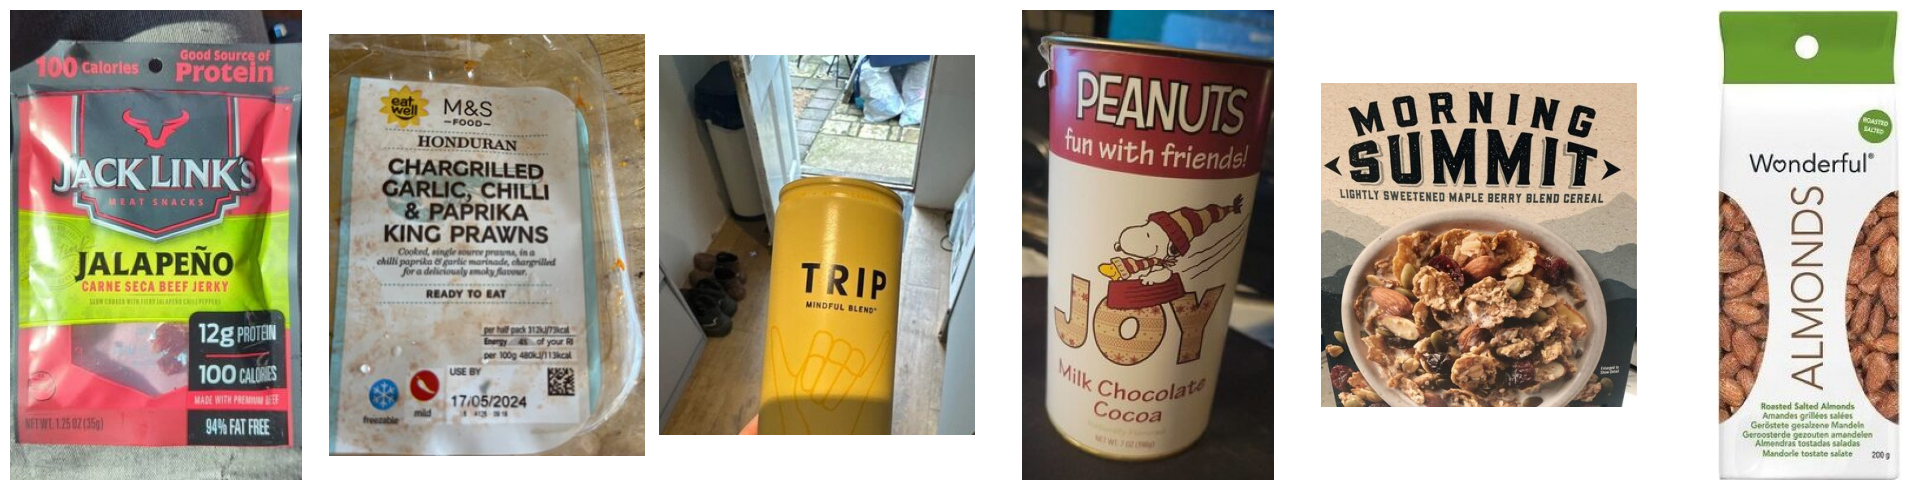

In [16]:

plot_sample_images(df_sample[~df_sample['image_url'].isna()], 'image_url', sample_size=6)

Image 1 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.400.jpg
Image 2 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.400.jpg
Image 3 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/00026772226/nutrition_fr.5.400.jpg
Image 4 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.400.jpg
Image 5 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/004128579/nutrition_es.5.400.jpg
Image 6 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/004622327/nutrition_es.5.400.jpg
Image 7 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/006021/nutrition_en.5.400.jpg
Image 8 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/

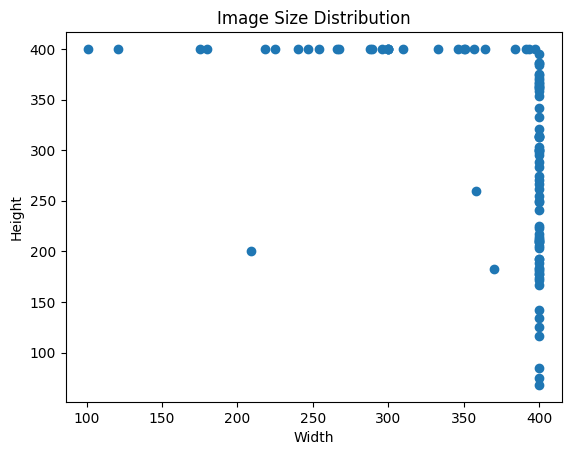

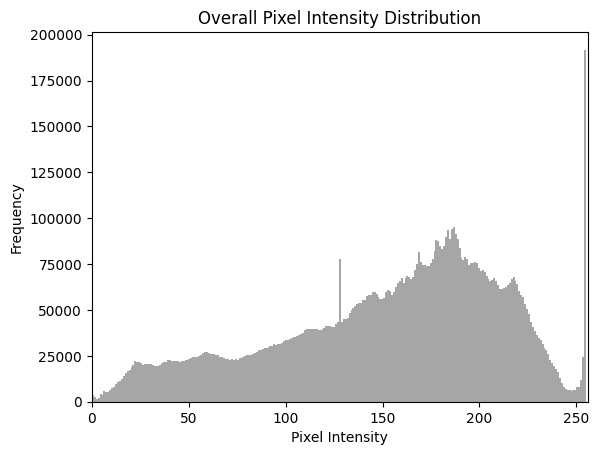

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Function to fetch image from URL and decode it without saving locally
def fetch_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Convert the response content to a numpy array and decode it into an image
        image = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        
        # Check if image was successfully downloaded and decoded
        if image is None:
            print(f"Failed to decode image from {url}")
            return None
        return image
    else:
        print(f"Failed to download image from {url}")
        return None

# Function to plot color histograms
def plot_color_histogram(image):
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    
    # Plot histogram for each color channel
    for channel, color in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    
    plt.show()

# Function to plot image size distribution
def plot_image_size_distribution(image_sizes):
    widths, heights = zip(*image_sizes)
    plt.figure()
    plt.title("Image Size Distribution")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.scatter(widths, heights)
    plt.show()

# Function to plot overall pixel intensity distribution
def plot_pixel_distribution(all_pixels):
    plt.figure()
    plt.title("Overall Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Flatten all pixel intensities and plot histogram
    all_pixels = np.concatenate(all_pixels, axis=None)
    plt.hist(all_pixels, bins=256, color='gray', alpha=0.7)
    plt.xlim([0, 256])
    plt.show()

# ---- Execution ----

# List of image URLs
url_list = df_sample[~df_sample['image_nutrition_url'].isna()]['image_nutrition_url'][:100].to_list()

# Lists to store image sizes and pixel intensities across all images
image_sizes = []
all_pixels = []

# Iterate through each URL, fetch the image, and analyze it
for index, url in enumerate(url_list):
    image = fetch_image_from_url(url)

    if image is not None:
        print(f"Image {index+1} fetched successfully from: {url}")
        
        # Step 1: Store image size (width, height)
        height, width, _ = image.shape
        image_sizes.append((width, height))

        # Step 2: Flatten pixel values (grayscale version) and store
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        all_pixels.append(gray_image.flatten())

# Step 3: Plot image size distribution (code from before)
plot_image_size_distribution(image_sizes)

# Step 4: Plot pixel intensity distribution (code from before)
plot_pixel_distribution(all_pixels)

In [18]:
def plot_top_items(data, column, title, count = True):
    # Count occurrences of each item
    if count:
        item_count = data[column].value_counts().reset_index()
        item_count.columns = [column, 'count']
    else:
        item_count = data.sort_values(by='count', ascending=False)

    # Get the top 20 items
    top_20_items = item_count.head(20)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_20_items[column], top_20_items['count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the highest count at the top

    # Descriptive statistics
    stats = item_count['count'].describe()

    # Annotate the plot with statistics in the lower right corner
    stats_text = (f"Count Statistics:\n"
                  f"Count: {stats['count']:.0f}\n"
                  f"Mean: {stats['mean']:.2f}\n"
                  f"Std: {stats['std']:.2f}\n"
                  f"Min: {stats['min']:.0f}\n"
                  f"25%: {stats['25%']:.0f}\n"
                  f"50%: {stats['50%']:.0f}\n"
                  f"75%: {stats['75%']:.0f}\n"
                  f"Max: {stats['max']:.0f}")

    plt.text(0.95, 0.05, stats_text, ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.5))

    plt.show()

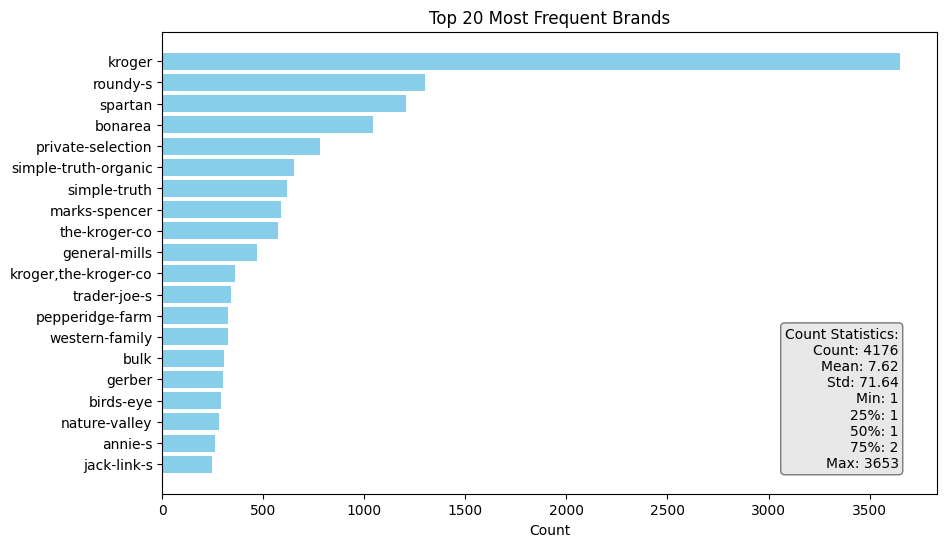

In [19]:
# Example usage:
plot_top_items(processed, 'brands_tags', 'Top 20 Most Frequent Brands')

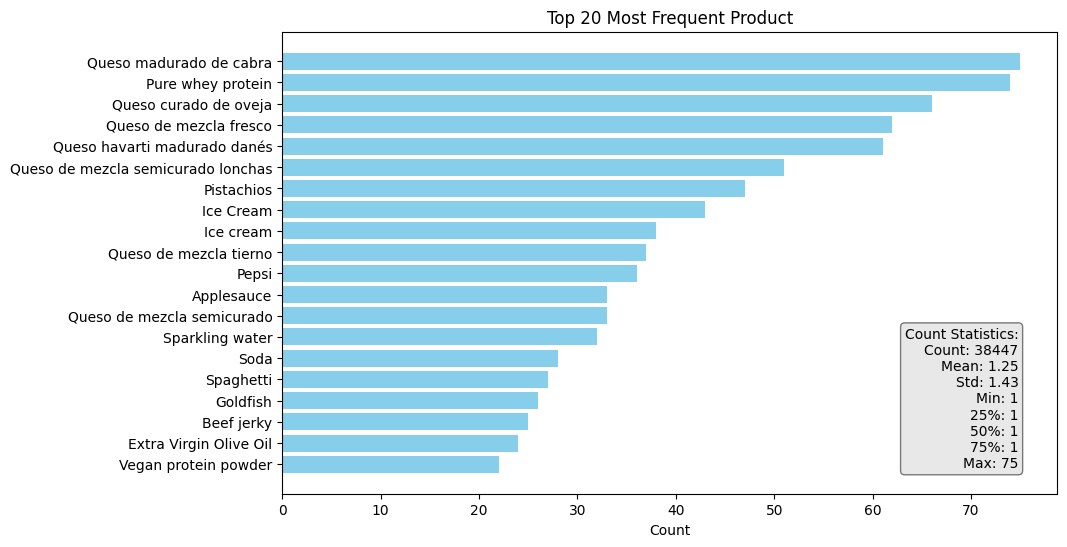

In [20]:
plot_top_items(processed, 'product_name', 'Top 20 Most Frequent Product')

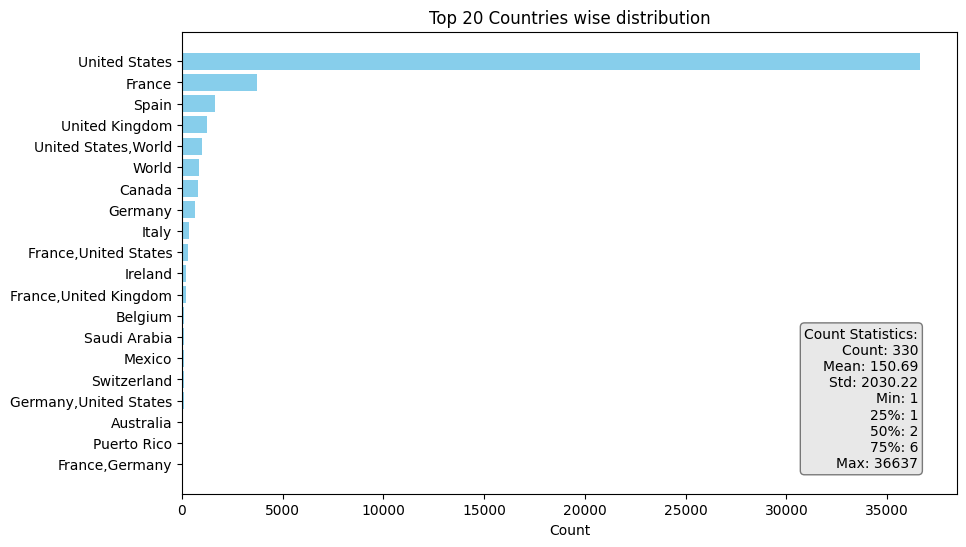

In [21]:
plot_top_items(processed, 'countries_en', 'Top 20 Countries wise distribution')


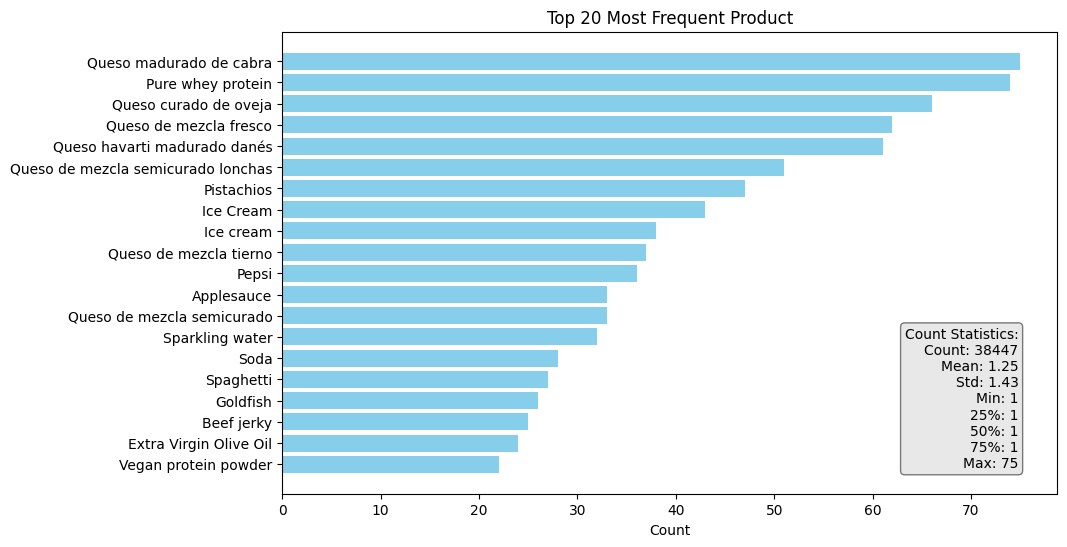

In [22]:
plot_top_items(processed, 'product_name', 'Top 20 Most Frequent Product')

In [55]:
import yaml

data = processed.loc[:,'energy_100g':]
wide_nutritions = data.columns
# Define nutrient buckets
config_path = 'config/configuration.yaml'

# Load configuration
config = load_config(config_path)
nutrient_buckets = config['nutrient_buckets']

# Create new features in the DataFrame based on nutrient buckets
for category, nutrients in nutrient_buckets.items():
    for nutrient, columns in nutrients.items():
        # Calculate the sum of each nutrient category
        data[f'{nutrient}_sum'] = data[columns].sum(axis=1, skipna=True)

In [56]:
bucketed = data.drop(columns = wide_nutritions)
correlation_matrix = bucketed.corr()

In [58]:
bucketed

Energy_sum  Fats_sum  Proteins_sum  Carbohydrates_sum  Vitamins_sum  \
0             0.0      0.00      0.000000               0.00           0.0   
1           690.0      4.00      1.500000              65.00           0.0   
2             0.0      2.30      2.700000               9.80           0.0   
3           238.0      0.30     10.000000               3.90           0.0   
4          1569.0     10.08      7.800000              70.10           0.0   
...           ...       ...           ...                ...           ...   
49995      1490.0      2.22      6.670000              75.56           0.0   
49996      1490.0      2.22      6.670000              75.56           0.0   
49997       602.0      2.80      5.600000              24.00           0.0   
49998      1490.0      0.00      6.670000              77.78           0.0   
49999      1488.0      0.00      6.666667              80.00           0.0   

       Minerals_sum  Fatty Acids_sum  Other Nutrients_sum  Other Factors_sum  
0            0.0000              0.0                  0.0                0.0  
1            0.0000              0.0                  0.0                0.0  
2            0.0000              0.0                  0.0                0.0  
3            0.0000              0.0                  0.0               -5.0  
4            0.0000              0.0                  0.0                0.0  
...             ...              ...                  ...                ...  
49995        0.2440              0.0                  0.0               -4.0  
49996        0.2440              0.0                  0.0               -4.0  
49997        0.3134              0.0                  0.0                0.0  
49998        0.0000              0.0                  0.0               -2.0  
49999        0.0000              0.0                  0.0                0.0  

[50000 rows x 9 columns]

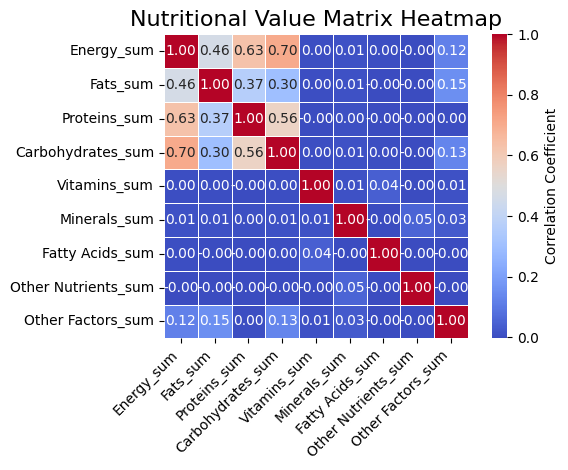

In [59]:
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation coefficients
            fmt=".2f",        # Format for annotation
            cmap='coolwarm',  # Color map
            cbar_kws={'label': 'Correlation Coefficient'},  # Color bar label
            square=True,      # Make the heatmap square-shaped
            linewidths=0.5,  # Lines between cells
            linecolor='white') # Line color
plt.title('Nutritional Value Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to fit labels
plt.show()